In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('../../../data/Clean_data.csv')

In [3]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-378.0,2014.0,NaN,NaN,NaN,NaN
21592,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,480.0,-1387.0,2015.0,NaN,NaN,NaN,NaN
21593,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,0.0,-657.0,2014.0,NaN,NaN,NaN,NaN
21594,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,190.0,1101.0,2015.0,NaN,NaN,NaN,NaN


In [4]:
df.drop(['zipcode'], axis=1, inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21242 entries, 0 to 21418
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21242 non-null  float64
 1   bedrooms          21242 non-null  float64
 2   bathrooms         21242 non-null  float64
 3   sqft_living       21242 non-null  float64
 4   sqft_lot          21242 non-null  float64
 5   floors            21242 non-null  float64
 6   waterfront        21242 non-null  int64  
 7   view              21242 non-null  float64
 8   condition         21242 non-null  float64
 9   grade             21242 non-null  float64
 10  sqft_above        21242 non-null  float64
 11  basement          21242 non-null  int64  
 12  yr_built          21242 non-null  float64
 13  yr_renovated      21242 non-null  float64
 14  lat               21242 non-null  float64
 15  long              21242 non-null  float64
 16  sqft_living15     21242 non-null  float6

In [7]:
mid_grades = df.loc[(df['grade'] == 7) | (df['grade'] == 8) | (df['grade'] == 9)]

In [8]:
mid_grades

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,0.0,3.0,7.0,...,0.0,0.0,0.0,-523.0,0.0,2014.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,0,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


In [19]:
base_model = df.copy()

X , y = base_model.drop(columns='price'), base_model[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)


In [23]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

# train_preds = model1.predict(X_train)
# y_train == train_preds 

test_preds = model1.predict(X_test)

cv_results = cross_val_score(model1, X_train, y_train, cv=5)
cv_results

#model1.score(y_test, test_preds)

array([0.77129001, 0.7394103 , 0.75512911, 0.73825387, 0.74757268])

In [26]:
scaler = StandardScaler()
# Calculate the standard deviation of the X_train dataset
scaler.fit(X_train)
# convert all values into their standard deviation equivalents.
X_train_scaled = scaler.transform(X_train)

scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)


In [28]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# train_preds = model_scaled.predict(X_train)
test_preds = model_scaled.predict(X_test_scaled)

cv_results = cross_val_score(model1, X_train_scaled, y_train_scaled, cv=5)
cv_results
#model_scaled.score(test_preds, y_test)

array([0.77174087, 0.73937868, 0.75512693, 0.73825336, 0.74758818])

In [ ]:
'''
model1 = LinearRegression()
model1.fit(X_train, y_train)

# train_preds = model1.predict(X_train)
# y_train == train_preds 

test_preds = model1.predict(X_test)

cv_results = cross_val_score(model1, X_train, y_train, cv=5)
cv_results

model1.score(y_test, test_preds)
'''

**Logging the scaled target (y) with the scaled predictors** 

In [48]:
#df_price_log = pd.DataFrame([])
df_price_log = np.log(y_train) #['log_price']
 
scaler.fit(df_price_log)
y_scaled_log_price_train = scaler.transform(df_price_log)

In [49]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_scaled_log_price_train)

# train_preds = model_scaled.predict(X_train)
test_preds = model_scaled.predict(X_test_scaled)

cv_results = cross_val_score(model1, X_train_scaled, y_scaled_log_price_train, cv=5)
cv_results

array([0.82101237, 0.81409015, 0.80113403, 0.81274972, 0.8114094 ])

In [ ]:
#_15's
#squareft_diff

In [50]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,0,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


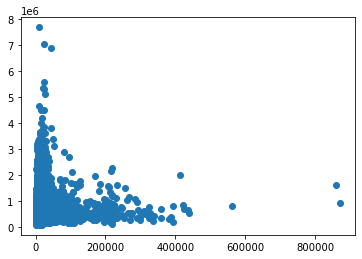

In [51]:
plt.scatter(df['sqft_lot15'], df['price']) #drop

In [56]:
model_3 = df.copy()
model_3 = model_3.drop(columns=['sqft_lot15'])

In [ ]:

X , y = model_3.drop(columns='price'), model_3[['price']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=8)

In [ ]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_scaled_log_price_train)

# train_preds = model_scaled.predict(X_train)
test_preds = model_scaled.predict(X_test_scaled)

cv_results = cross_val_score(model1, X_train_scaled, y_scaled_log_price_train, cv=5)
cv_results